In [8]:
from pymongo import MongoClient
from dotenv import load_dotenv
import os

# Load environment variables
dotenv_path = r'C:\Users\Soko\Documents\GitHub\VUACode\.env'
load_dotenv(dotenv_path)
mongodb_uri = os.getenv('MONGODB_URI')

# Connect to MongoDB
client = MongoClient(mongodb_uri)
db = client['twinning_papers']
collection = db['papers']

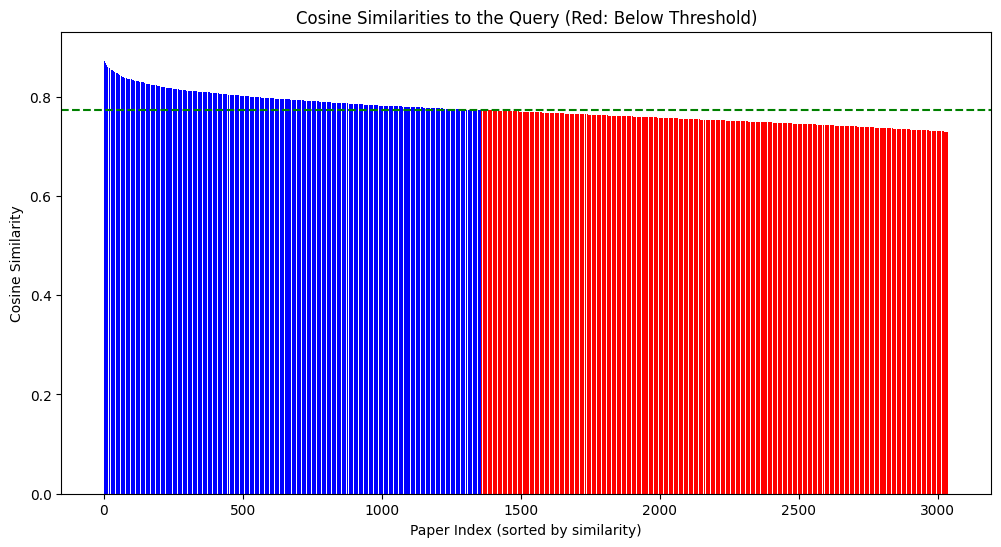

Documents with similarity below the threshold:
Threshold: 0.772835626938547
Mean: 0.772835626938547Standard Deviation: 0.028456239639207154 

Number of low similarity documents: 1685
Discussions on the large group
Influence of hypothyroidism on in vitro fertilization outcomes
New method of making point contacts
Memory Fields, Attention, and the Resonance of Narrative
Role of second‐trimester ultrasound in screening for Down syndrome
A great divide
Identical Twins x 3
Sodium channel mutation in irritable bowel syndrome: evidence for an ion channelopathy.
The Danish Twin Apartment Study; Part I: Formaldehyde and Long‐Term VOC Measurements
Treatment of Dependency and Correlation in Multiunit PSA Considering Seismic as External Event
Twin-HMM-based non-intrusive speech intelligibility prediction
Twin Rotor Damper for Human-Induced Vibrations of Footbridges
Omega-3 fatty acids correlate with gut microbiome diversity and production of N-carbamylglutamate in middle aged and elderly women
Peri

In [29]:
import os
import matplotlib.pyplot as plt
from pymongo import MongoClient
from dotenv import load_dotenv
from sklearn.metrics.pairwise import cosine_similarity
from langchain.embeddings import OpenAIEmbeddings
import numpy as np
import json

# Load environment variables
dotenv_path = r'C:\Users\Soko\Documents\GitHub\VUACode\.env'
load_dotenv(dotenv_path)
mongodb_uri = os.getenv('MONGODB_URI')

# Connect to MongoDB
client = MongoClient(mongodb_uri)
db = client['twinning_papers']
collection = db['papers']

# Initialize OpenAI Embeddings
embeddings = OpenAIEmbeddings(disallowed_special=())
# Compute cosine similarity
def compute_similarity(query_embedding, document_embeddings):
    similarities = cosine_similarity([query_embedding], document_embeddings)[0]
    return similarities

# Function to get valid embeddings and titles from MongoDB
def get_valid_embeddings_and_titles():
    papers = collection.find({}, {"embedding": 1, "title": 1})
    return [(paper['embedding'], paper.get('title', 'No Title'))
            for paper in papers if 'embedding' in paper and isinstance(paper['embedding'], list) and len(paper['embedding']) == 1536]

query = "Heritability in DZ twins"
query_embedding = embeddings.embed_documents([query])[0]

# Retrieve valid embeddings and titles, and compute similarities
documents = get_valid_embeddings_and_titles()
if not documents:
    raise ValueError("No valid embeddings found in the database.")

document_embeddings, document_titles = zip(*documents)
similarities = compute_similarity(query_embedding, document_embeddings)

# Calculate the mean and standard deviation of the cosine similarity scores
mean = np.mean(similarities)
std_dev = np.std(similarities)

# Set the threshold to be the mean plus one standard deviation
threshold = mean
low_similarity_titles = [title for title, similarity in zip(document_titles, similarities) if similarity < threshold]
colors = ['red' if sim < threshold else 'blue' for sim in similarities]

# Sort similarities and colors together
sorted_similarities_colors = sorted(zip(similarities, colors), key=lambda x: x[0], reverse=True)
sorted_similarities, sorted_colors = zip(*sorted_similarities_colors)

# Visualization with threshold indication
plt.figure(figsize=(12, 6))
plt.bar(range(len(sorted_similarities)), sorted_similarities, color=sorted_colors)
plt.axhline(y=threshold, color='green', linestyle='--')
plt.xlabel('Paper Index (sorted by similarity)')
plt.ylabel('Cosine Similarity')
plt.title('Cosine Similarities to the Query (Red: Below Threshold)')
plt.show()

# Print titles of low similarity documents
print("Documents with similarity below the threshold:")
print(f"Threshold: {threshold}")
# count
print(f"Mean: {mean}"
      f"Standard Deviation: {std_dev} \n")
print(f"Number of low similarity documents: {len(low_similarity_titles)}")
for title in low_similarity_titles:
    print(title)

In [ ]:

# 
# with open('low_similarity_papers.jsonl', 'w') as f:
# 
#     # Print titles of low similarity documents and remove these from MongoDB
#     print("Documents with similarity below the threshold:")
#     print(f"Threshold: {threshold}")
#     print(f"Mean: {mean}")
#     print(f"Standard Deviation: {std_dev} \n")
# 
#     # Loop through the titles with low similarity
#     for idx, (title, similarity) in enumerate(zip(document_titles, similarities)):
#         if similarity < threshold:
#             # Fetch the paper
#             paper = collection.find_one({'title': title})
# 
#             if paper is None:
#                 print(f'Paper not found with title: {title}')
#             else:
#                 collection.delete_one({'_id': paper['_id']})
# 
#     # Fetch low similarity titles count after removal process
#     low_similarity_titles = [title for title, similarity in zip(document_titles, similarities) if similarity < threshold]
# 
#     print(f"Number of low similarity documents: {len(low_similarity_titles)}")

In [27]:
import numpy as np
import matplotlib.pyplot as plt

negative_keywords = ["disease", "tumor", "cancer", "carcinoma", "hepatitis",
                     "twin studies", "twin model", "heritability", "ae(c) model",
                     "the classical twin method", "digital twin", "monozygotic"]

def find_keyword_matches(collection):
    papers = collection.find({}, {"embedding": 1, "title": 1, "abstract": 1})
    matched_papers = []
    for paper in papers:
        if any(keyword in paper.get('title', '').lower() or keyword in paper.get('abstract', '').lower() for keyword in negative_keywords):
            matched_papers.append(paper)
    return matched_papers

def delete_records_with_keywords(collection):
    papers = collection.find({}, {"title": 1, "abstract": 1})
    for paper in papers:
        if any(keyword in paper.get('title', '').lower() or keyword in paper.get('abstract', '').lower() for keyword in negative_keywords):
            print(f"Deleting paper: {paper['title']}")
            collection.delete_one({"_id": paper["_id"]})

# Use your MongoDB collection here.
matched_papers = find_keyword_matches(collection)
print(len(matched_papers))
for paper in matched_papers:
    print(paper['title'])
filtered_papers = delete_records_with_keywords(collection)

825
Towards a Horticulture System of Systems: A case study of Modular Edge AI, Robotics and an Industry Good Digital Twin
Human digital twin, the development and impact on design
Lipid trait-associated genetic variation is associated with gallstone disease in the diverse Third National Health and Nutrition Examination Survey (NHANES III)
Towards understanding and synthesis of contact-rich anthropomorphic motions through interactive cyber-physical human
Behavior Genetics: From Heritability to Gene Finding
Genetics of cluster headache
Quality Deviation Control for Aircraft Using Digital Twin
Smart city digital twins
Preferences and skills : four studies into unobserved human nature and its implications
Tumor-Associated and Disease-Associated Autoantibody Repertoires in Healthy Colostrum and Maternal and Newborn Cord Sera
Why depression is associated with increased risk towards premature labor.
The Genetics of Diabetes Mellitus — A Review of Twin Studies
[Value of anti-human heterogeneous

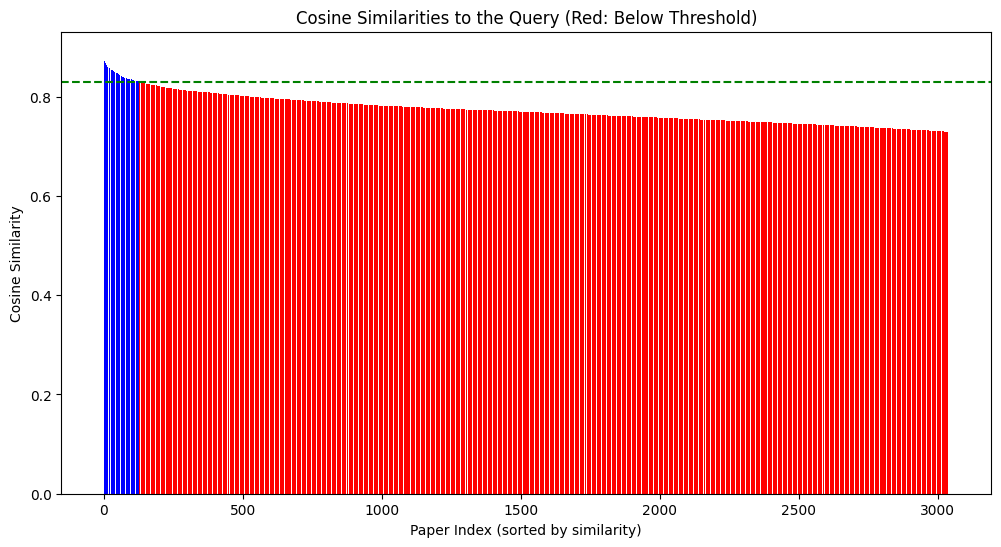

Documents with similarity below the threshold:
Threshold: 0.8297481062169614
Mean: 0.772835626938547Standard Deviation: 0.028456239639207154 

Documents with similarity above the threshold:
Optimal Schooling Investments and Earnings: An Analysis Using Australian Twins Data
The Utility of Twins for Epigenetic Analysis
Same-Sex Twin Pair Phenotypic Correlations are Consistent with Human Y Chromosome Promoting Phenotypic Heterogeneity
Epidemiology of twin brirths and biology of human reproduction
Genetic and Environmental Effects on Same-sex Sexual Behavior: A Population Study of Twins in Sweden
Medical demography and epidemiology: dizygotic twins
[Role of genetic factors in the formation of trace reactions in man].
Genetic contributions to saliva protein concentrations in adult human twins.
Dizygotic twinning is not linked to variation at the alpha-inhibin locus on human chromosome 2.
Endophenotypes in psychiatric genetics
Same-Sex Twin Pair Phenotypic Correlations are Consistent with Hu

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def get_valid_embeddings_and_titles():
    # Define negative keywords
    negative_keywords = ["disease", "tumor", "cancer", "carcinoma", "hepatitis",
                         "twin studies", "twin model", "heritability", "ae(c) model",
                         "the classical twin method", "digital twin", "monozygotic"]

    papers = collection.find({}, {"embedding": 1, "title": 1, "abstract": 1})
    filtered_papers = []
    for paper in papers:
        if 'embedding' in paper and isinstance(paper['embedding'], list) and len(paper['embedding']) == 1536:
            # Check if the paper's title or abstract contains any of the negative keywords
            if not any(keyword in paper.get('title', '').lower() or keyword in paper.get('abstract', '').lower() for keyword in negative_keywords):
                filtered_papers.append((paper['embedding'], paper.get('title', 'No Title')))
    return filtered_papers

documents = get_valid_embeddings_and_titles()
document_embeddings, document_titles = zip(*documents)
similarities = compute_similarity(query_embedding, document_embeddings)

# Calculate the mean and standard deviation of the cosine similarity scores
mean = np.mean(similarities)
std_dev = np.std(similarities)

# Set the threshold to be the mean plus two standard deviations
threshold = mean + (2 * std_dev)

low_similarity_titles = [title for title, similarity in zip(document_titles, similarities) if similarity < threshold]
colors = ['red' if sim < threshold else 'blue' for sim in similarities]

# Sort similarities and colors together
sorted_similarities_colors = sorted(zip(similarities, colors), key=lambda x: x[0], reverse=True)
sorted_similarities, sorted_colors = zip(*sorted_similarities_colors)

# Visualization with threshold indication
plt.figure(figsize=(12, 6))
plt.bar(range(len(sorted_similarities)), sorted_similarities, color=sorted_colors)
plt.axhline(y=threshold, color='green', linestyle='--')
plt.xlabel('Paper Index (sorted by similarity)')
plt.ylabel('Cosine Similarity')
plt.title('Cosine Similarities to the Query (Red: Below Threshold)')
plt.show()


print("Documents with similarity below the threshold:")
print(f"Threshold: {threshold}")
print(f"Mean: {mean}"
      f"Standard Deviation: {std_dev} \n")

# Identifying documents with similarity above the threshold
high_similarity_titles = [title for title, similarity in zip(document_titles, similarities) if similarity >= threshold]

# Print titles of high similarity documents
print("Documents with similarity above the threshold:")
for title in high_similarity_titles:
    print(title)

Number of outliers: 2485
Outlier documents, sorted by relevance:

#1
Document: Twin Pregnancy and Births in Cattle Induced by FSH and PGF2.ALPHA. or PGF2.ALPHA.-Analogue Treatment., Relevance: 6.140327678393787
--------------------------------------------------
#2
Document: Edinburgh Research Explorer SmartSociety – A Platform for Collaborative People-Machine Computation SmartSociety – A Platform for Collaborative People-Machine Computation, Relevance: 5.798829098684162
--------------------------------------------------
#3
Document: Effects of Treatment with the Highly Purified Porcine FSH Preparation on Induction of Twin Pregnancy in Cattle., Relevance: 5.6115366002127365
--------------------------------------------------
#4
Document: Production of identical sheep twins using a razor blade for bisection of hatched blastocysts., Relevance: 5.5626823196930655
--------------------------------------------------
#5
Document: TISSUE-SPECIFIC AND DIFFERENTIAL REGULATION OF AT1 AND AT2 GENE E

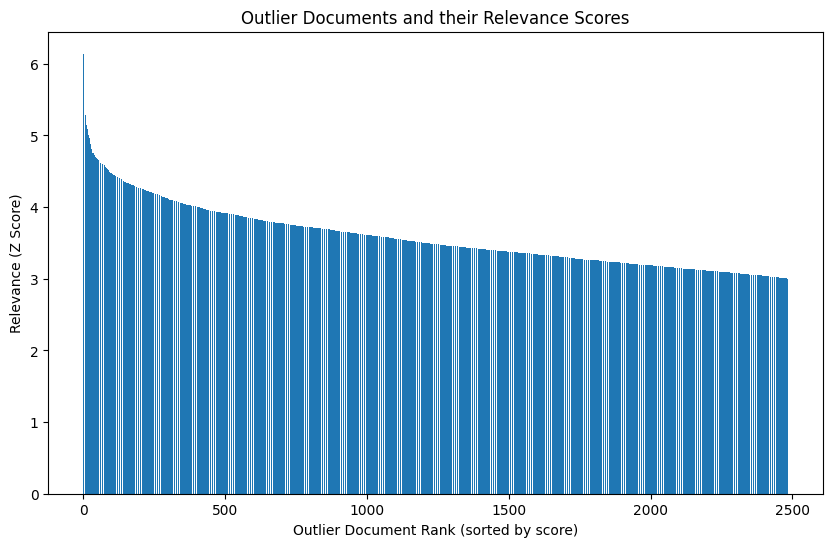

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming document_embeddings is a list of your embeddings
embeddings_array = np.array(document_embeddings)

# Calculate the mean and standard deviation of the embeddings
mean = np.mean(embeddings_array, axis=0)
std_dev = np.std(embeddings_array, axis=0)

# Calculate the Z-scores for each embedding
z_scores = (embeddings_array - mean) / std_dev

# Identify any embeddings with an absolute Z-score greater than 3 as outliers
outliers = np.where(np.abs(z_scores) > 3)

outlier_document_indices = np.unique(outliers[0])
print(f"Number of outliers: {len(outlier_document_indices)}")

# For each outlier document, get the maximum absolute Z-score across all dimensions
outlier_scores = [np.max(np.abs(z_scores[i])) for i in outlier_document_indices]

# Combine indices and scores into a list of tuples
outliers_and_scores = list(zip(outlier_document_indices, outlier_scores))

# Sort by relevance (score), in descending order
sorted_outliers_and_scores = sorted(outliers_and_scores, key=lambda x: x[1], reverse=True)


# New presentation of print statements:
print("Outlier documents, sorted by relevance:\n")
for counter, outlier in enumerate(sorted_outliers_and_scores, start=1):
    index, score = outlier
    print(f"#{counter}")
    print(f"Document: {document_titles[index]}, Relevance: {score}")
    print("-" * 50)

# Outlier scores for plotting
outlier_scores_for_plotting = [score for _, score in sorted_outliers_and_scores]

# Now let's plot
plt.figure(figsize=(10,6))
plt.bar(range(len(outlier_scores_for_plotting)), outlier_scores_for_plotting)
plt.title('Outlier Documents and their Relevance Scores')
plt.xlabel('Outlier Document Rank (sorted by score)')
plt.ylabel('Relevance (Z Score)')
plt.show()

In [3]:
!pip install nltk

  Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)


In [55]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# defining the positive_keywords_groups
positive_keywords_groups = {
    "Genetic Factors": ["Chorionicity", "Twinning Genetics Consortium", "Zygosity", "SNP", "Gene Loci", "Genetic Predisposition"],
    "Hormonal Factors": ["Hormones", "FSH", "Luteinizing hormone", "FSH Levels", "hormonal regulation"],
    "Epidemiological Factors": ["Lifestyle", "Maternal Health", "demographic data"],
    "Twinning Analysis": ["Dizygotic Twinning", "Dizygotic Twins", "Pedigree analysis", "meta-analysis", "Fertility", "Dizygotic", "Twin Comparison"],
    "Reproductive Traits": ["Fertility", "Assisted Reproductive Technology", "Multiple Births", "IVF", "ART"],
    "Twinning Rates": ["Multiple Pregnancy", "Twinning", "Dizygotic Twinning", "Multiple Ovulation", "Double Ovulation", "Twinning Trends", "Geographical Variation", "Medical Interventions", "Ovulation Rates", "Multiple Pregnancy", "Twinning",
                       "Dizygotic Twinning", "Multiple Ovulation", "Double Ovulation"],
    "Animal Models": ["Sheep", "Cows", "Humans", "Embryonic Development", "Livestock", "Cattle"]
}

# normalize positive_keywords_groups by lowercasing and stemming  
normalized_keywords = {}
for key, words in positive_keywords_groups.items():
    normalized_keywords[key] = []
    for word in words:
        word = word.lower()
        word = ' '.join([lemmatizer.lemmatize(w) for w in word_tokenize(word)])
        normalized_keywords[key].append(word)

relevant_papers_count = 0


irrelevant_papers = []

# Iterate over each paper
for paper in collection.find():
    title = paper["title"].lower()
    abstract = paper["abstract"].lower()

    # Lemmatize the title and abstract
    title = ' '.join([lemmatizer.lemmatize(w) for w in word_tokenize(title)])
    abstract = ' '.join([lemmatizer.lemmatize(w) for w in word_tokenize(abstract)])

    # Count as relevant paper if any of the keyword exists in the title or abstract
    relevant = False
    for keywords in normalized_keywords.values():
        if any(keyword in title or keyword in abstract for keyword in keywords):
            relevant = True
            break

    if not relevant:
        irrelevant_papers.append(paper["title"])

print(f"Count of irrelevant papers: {len(irrelevant_papers)}")
for title in irrelevant_papers:
    print(title)

Count of irrelevant papers: 305
The Case of Heinrich Wilhelm Poll (1877–1939): 
A German-Jewish Geneticist, Eugenicist, Twin Researcher, 
and Victim of the Nazis
Discussions on the large group
Memory Fields, Attention, and the Resonance of Narrative
Rooting history in the genes
Zwillingsschwangerschaften nach natürlicher Konzeption: wie stark ist die erbliche Komponente?
Treatment of Dependency and Correlation in Multiunit PSA Considering Seismic as External Event
ααααanti-3.7 type II: a new α-globin gene rearrangement suggesting that the α-globin gene duplication could be caused by intrachromosomal recombination
Omega-3 fatty acids correlate with gut microbiome diversity and production of N-carbamylglutamate in middle aged and elderly women
A non-genetic, epigenetic-like mechanism of telomere length inheritance?
Application of Wavelet Packet Transform to detect genetic polymorphisms by the analysis of inter-Alu PCR patterns
Mother-infant cannibalism in thick-tailed bushbabies (Galago 